In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data.csv', index_col='Date')
df.index = pd.to_datetime(df.index)
df.describe()

,dam_Houayho,dam_Zibihe,dam_Huai Kum,dam_Jinghong,dam_Xe Kaman 3,dam_Sirindhorn,dam_Lower Sesan II,dam_Krong Buk Ha,dam_Ubol Ratana,dam_Lam Pao,...,dam_Xiaowan,dam_Gongguoqiao,dam_Nam Ngum 2,dam_Lamnangrong,dam_Danhim,dam_Ham Thuan 1,rw_242,rw_34,rw_239,rw_223
count,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,...,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000
mean,22.985656,8.805082,1.560371,27.940399,3.324275,213.136177,107.274070,8.651099,223.014764,166.630459,...,209.143001,24.949202,91.449363,12.233188,7.439510,21.680616,3.001978,1.599968,1.464913,1.788429
std,4.774529,0.894026,0.301147,2.241833,1.128358,22.574698,88.303915,2.488575,53.889996,48.160976,...,49.817890,4.797136,14.025459,1.747576,1.576595,4.106918,2.741003,0.993559,1.236499,0.910529
min,12.318094,1.247681,0.612069,23.338728,0.646062,85.438801,25.051561,2.615289,138.934410,79.266080,...,99.228322,9.745472,53.945697,5.960928,3.293061,11.500426,0.000000,0.610000,0.000000,0.460000
25%,19.633219,8.205672,1.363189,26.397418,2.555199,191.949695,29.558485,6.850456,178.687293,127.018791,...,177.265108,21.942737,83.562686,12.017644,6.396198,18.353575,1.490000,0.720000,0.650000,1.040000
50%,24.138144,8.767917,1.670502,28.036604,3.468520,216.175199,36.383084,8.984272,216.588314,160.471624,...,204.362440,25.605286,95.251374,12.610761,8.070314,22.867368,2.510000,1.230000,1.080000,1.480000
75%,26.378084,9.216646,1.783813,29.247710,4.159880,230.854714,204.779958,10.263125,262.839255,198.339500,...,238.259460,28.501962,103.395612,12.974127,8.620940,25.140052,3.970000,2.420000,1.870000,2.470000
max,32.174921,10.878974,1.970091,37.935631,5.686638,265.345856,246.992083,36.519225,357.957917,259.286712,...,321.850173,43.980487,111.212611,15.015063,10.766837,26.884383,29.510000,4.640000,8.650000,4.850000


In [3]:
def plot(df):
    fig, axs = plt.subplots(10, 4, figsize=(20, 50))
    for i, col in enumerate(df.columns):
        axs[i//4, i%4].plot(df[col])
        axs[i//4, i%4].set_title(col)

In [4]:
group = df.rolling(180).mean()

/home/duongbao/Dropbox/code/HydroViet/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


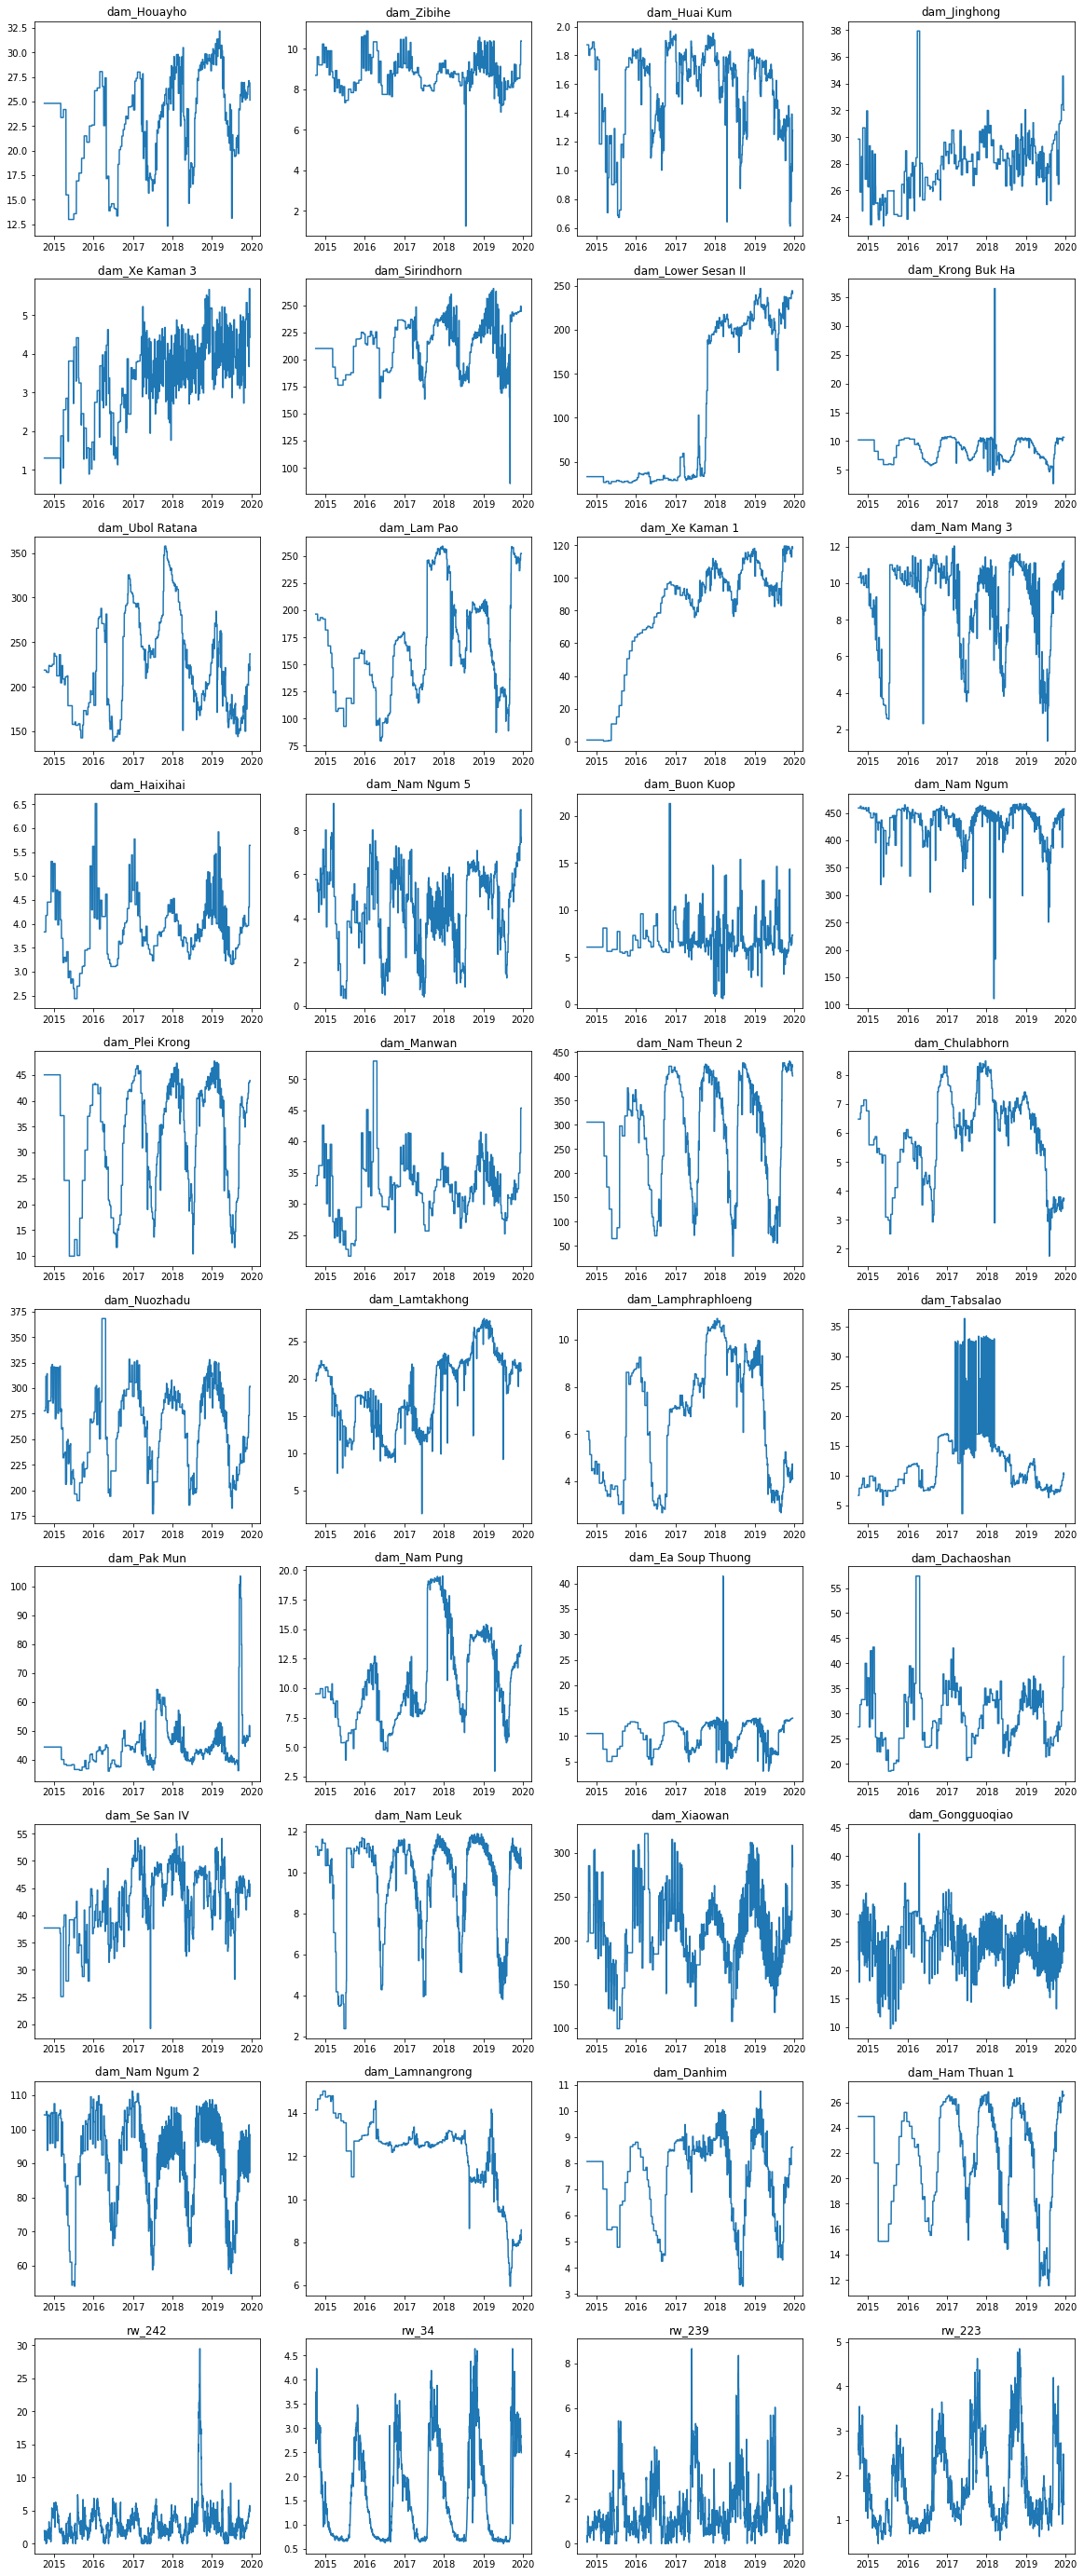

In [5]:
plot(df)

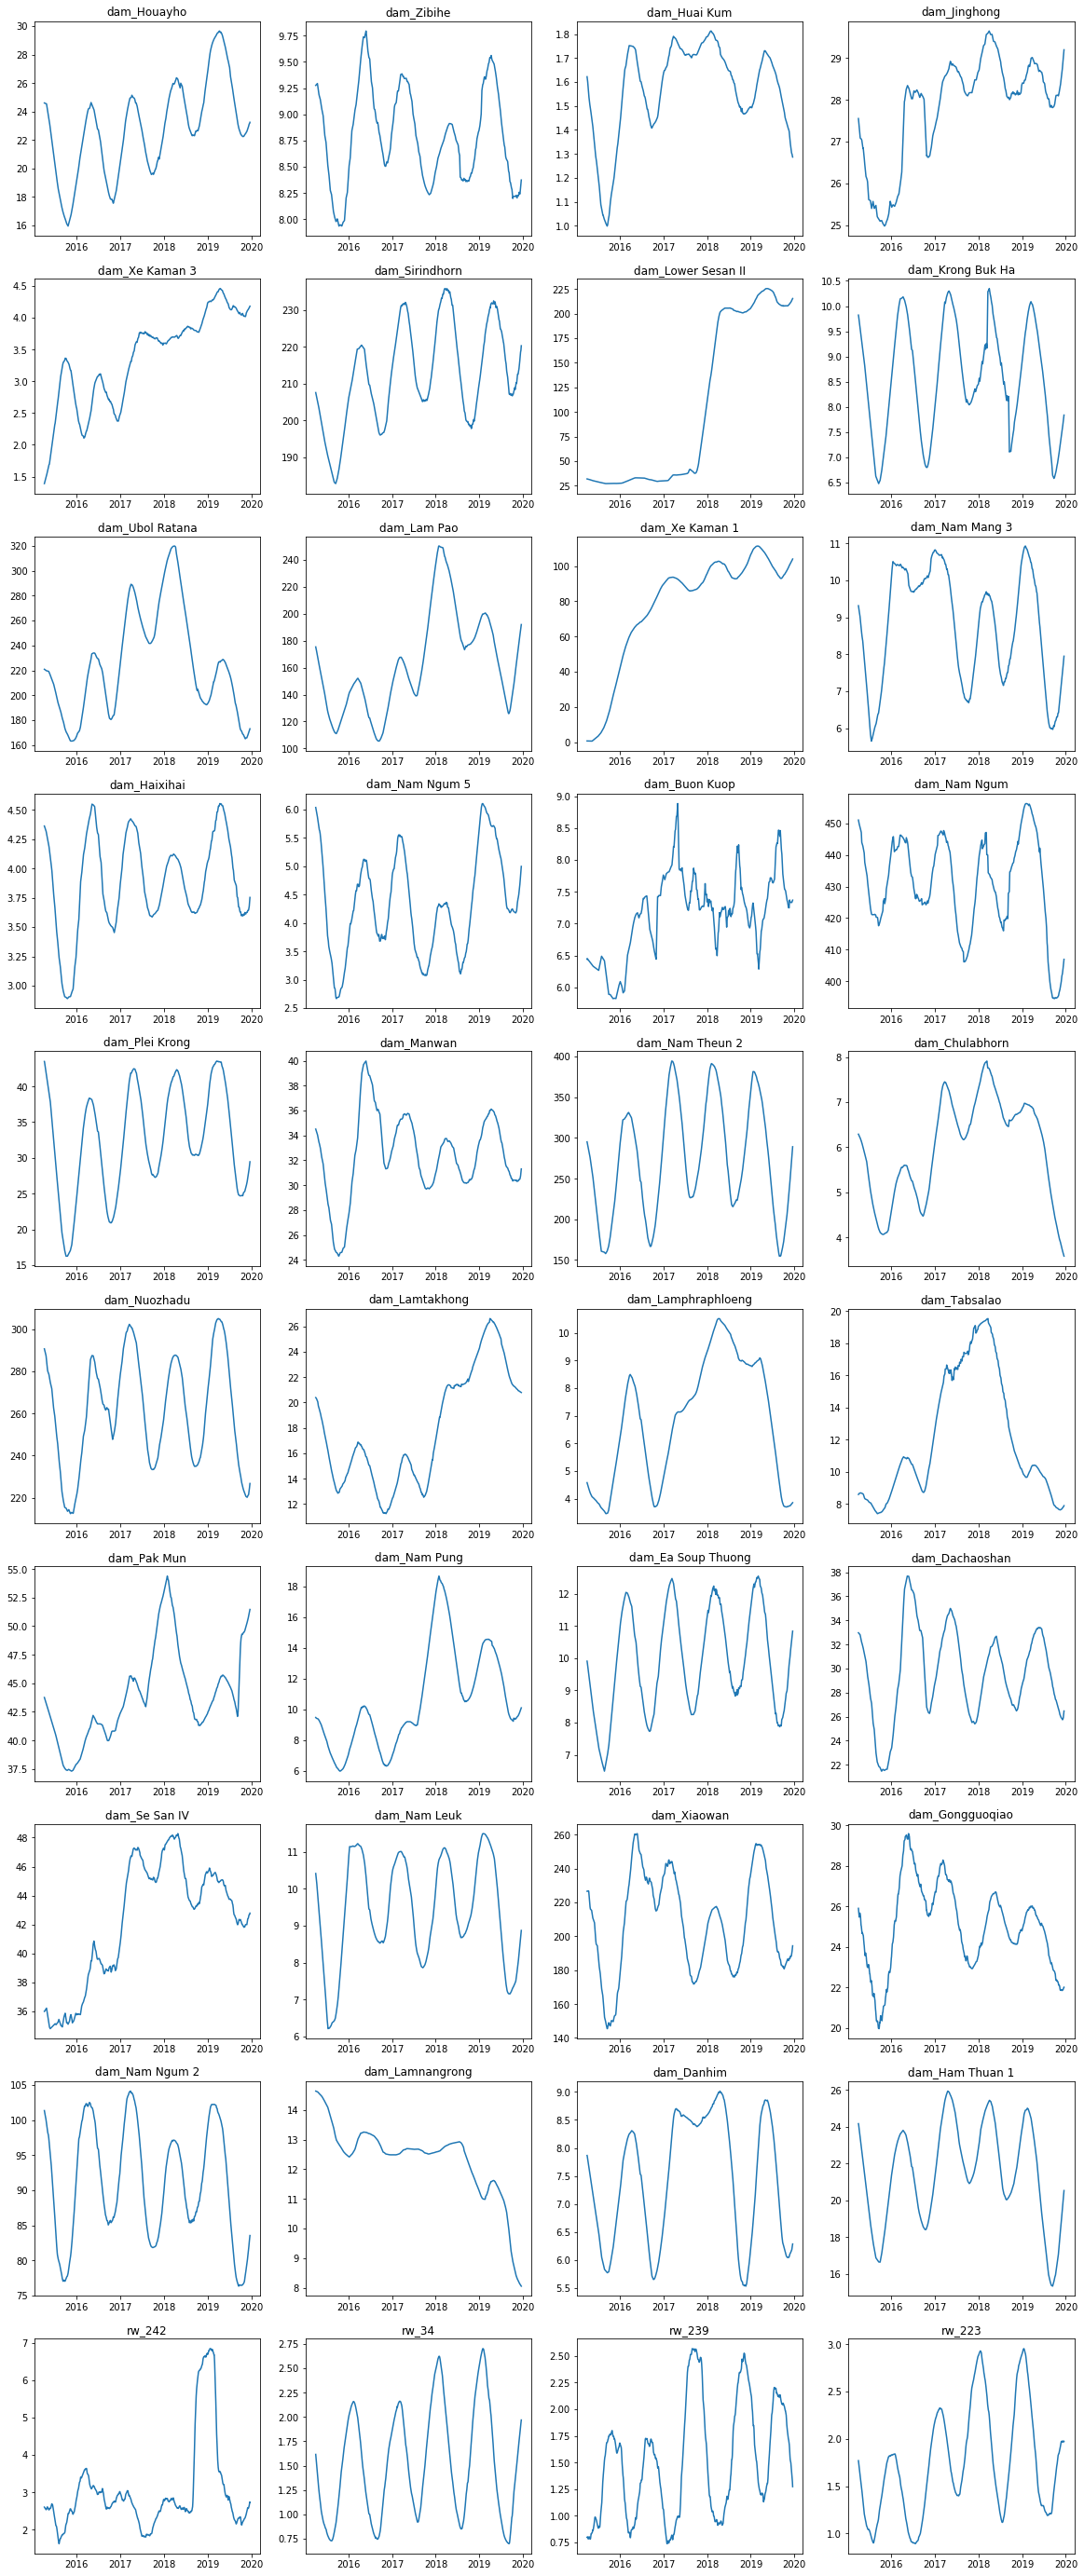

In [6]:
plot(group)

In [11]:
from statsmodels.tsa import stattools as STool
def unit_root_test(title, X):
    """
    H_0: data has unit root -> non-stationary
    statistic: more negative more likely stationary
    p-value > 0.05: non-stationary, other wise: stationary
    """
    print("===========================")
    print('ADF test for ', title)
    result = STool.adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    plt.figure(figsize = (10, 5))
    plt.plot(X.rolling(30).mean())
    plt.show()

ADF test for  dam_Houayho
ADF Statistic: -2.725091
p-value: 0.069796
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


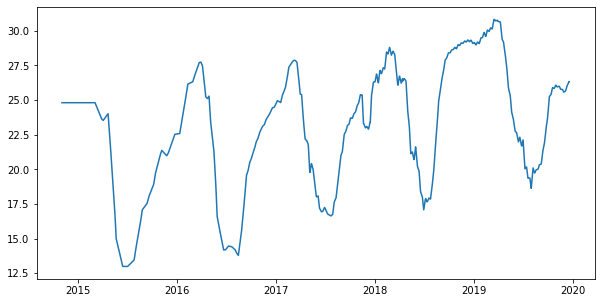

ADF test for  dam_Zibihe
ADF Statistic: -3.723607
p-value: 0.003793
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


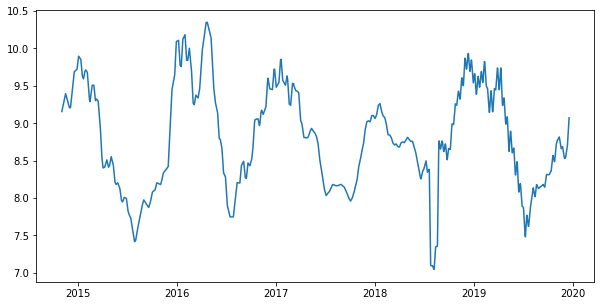

ADF test for  dam_Huai Kum
ADF Statistic: -3.305151
p-value: 0.014650
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


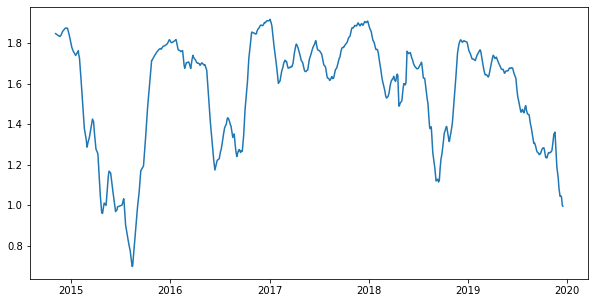

ADF test for  dam_Jinghong
ADF Statistic: -4.425373
p-value: 0.000268
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


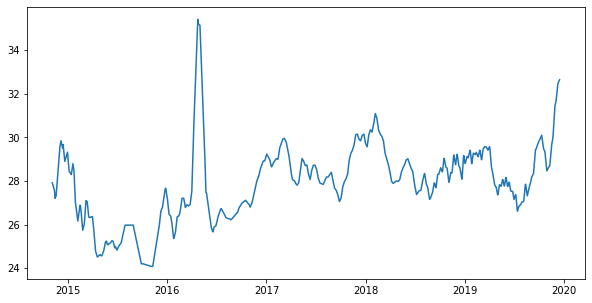

ADF test for  dam_Xe Kaman 3
ADF Statistic: -2.648267
p-value: 0.083426
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


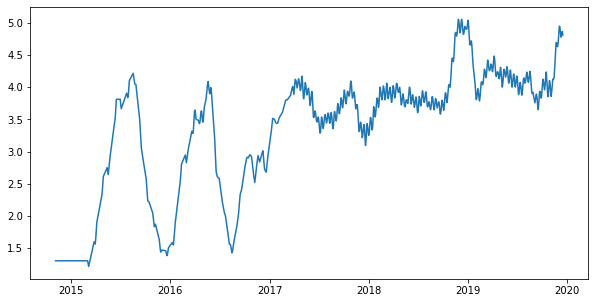

ADF test for  dam_Sirindhorn
ADF Statistic: -2.947993
p-value: 0.040045
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


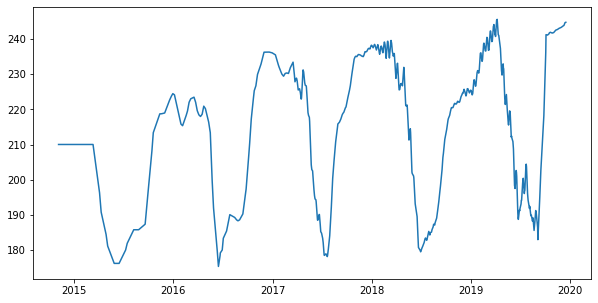

ADF test for  dam_Lower Sesan II
ADF Statistic: -0.514787
p-value: 0.889098
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


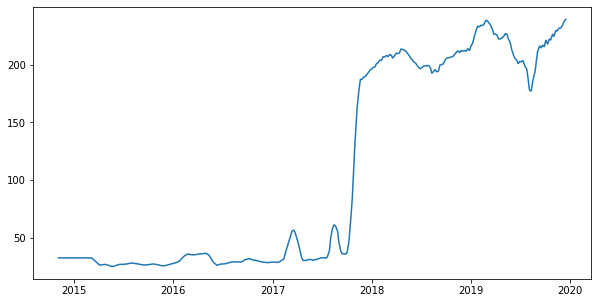

ADF test for  dam_Krong Buk Ha
ADF Statistic: -3.858134
p-value: 0.002366
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


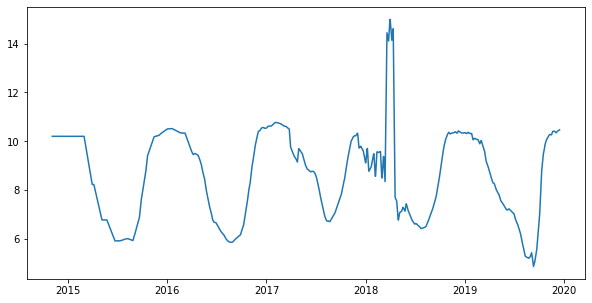

ADF test for  dam_Ubol Ratana
ADF Statistic: -2.216782
p-value: 0.200211
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


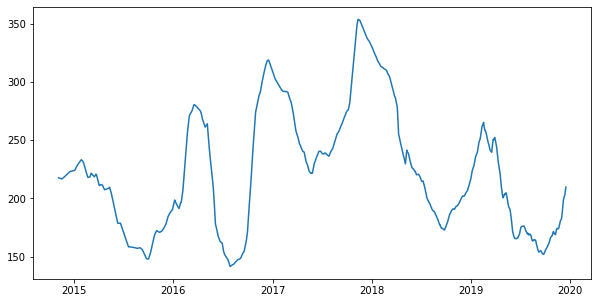

ADF test for  dam_Lam Pao
ADF Statistic: -2.299115
p-value: 0.172254
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


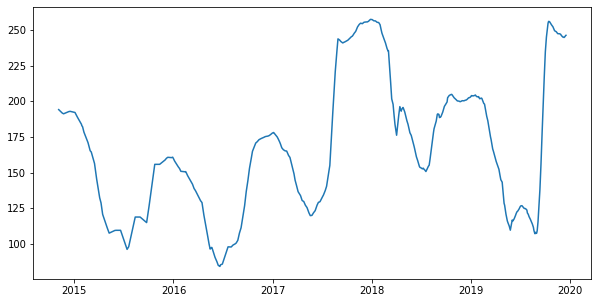

ADF test for  dam_Xe Kaman 1
ADF Statistic: -1.815939
p-value: 0.372578
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


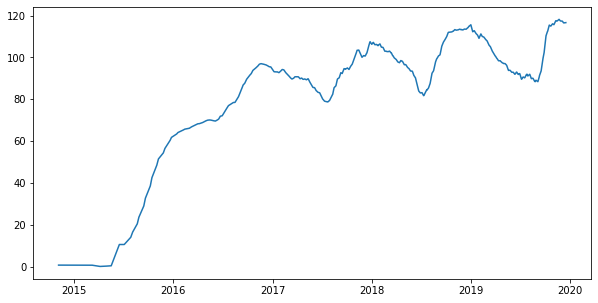

ADF test for  dam_Nam Mang 3
ADF Statistic: -3.373241
p-value: 0.011906
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


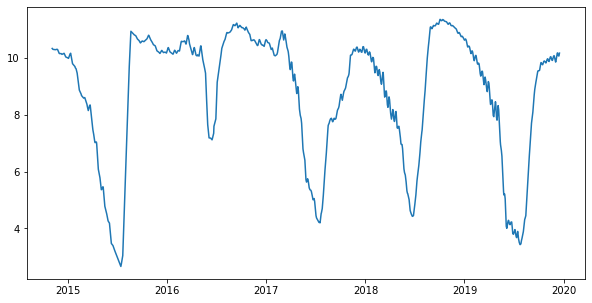

ADF test for  dam_Haixihai
ADF Statistic: -2.975734
p-value: 0.037224
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


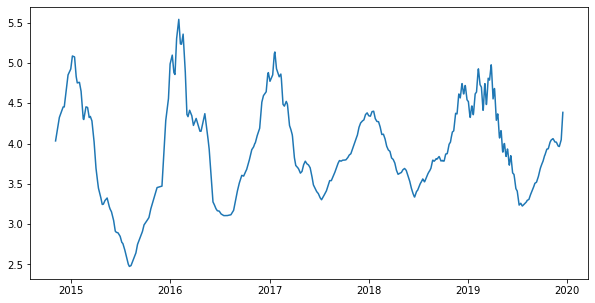

ADF test for  dam_Nam Ngum 5
ADF Statistic: -3.895925
p-value: 0.002065
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


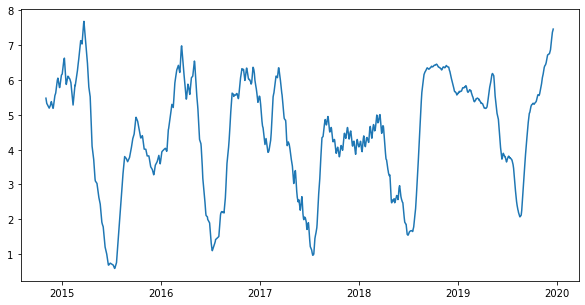

ADF test for  dam_Buon Kuop
ADF Statistic: -7.465736
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


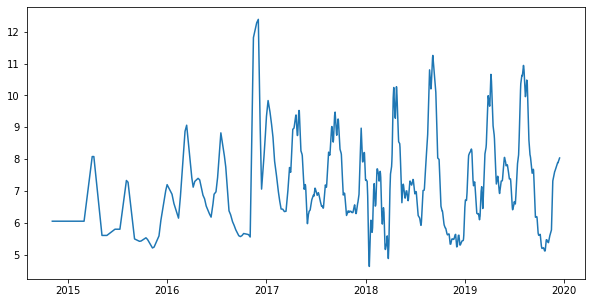

ADF test for  dam_Nam Ngum
ADF Statistic: -5.287886
p-value: 0.000006
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


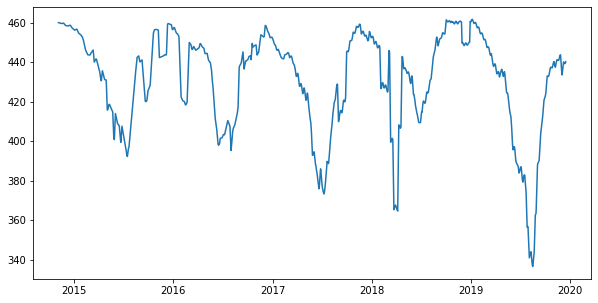

ADF test for  dam_Plei Krong
ADF Statistic: -3.025443
p-value: 0.032586
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


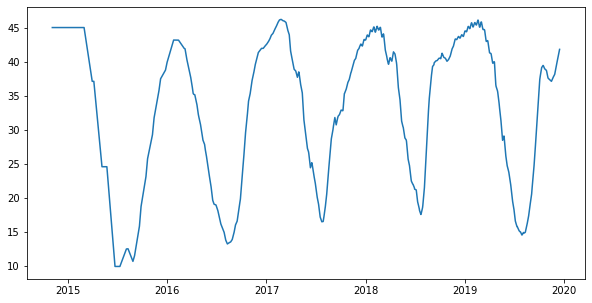

ADF test for  dam_Manwan
ADF Statistic: -3.721945
p-value: 0.003815
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


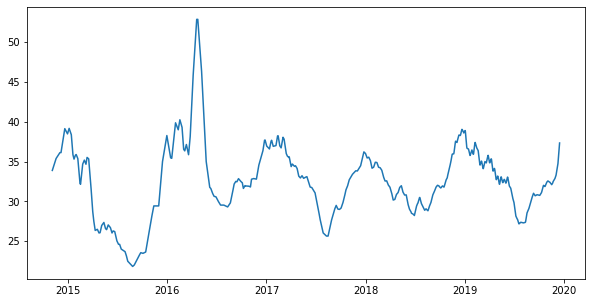

ADF test for  dam_Nam Theun 2
ADF Statistic: -3.729089
p-value: 0.003722
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


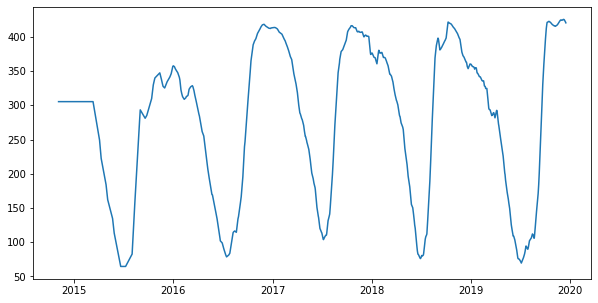

ADF test for  dam_Chulabhorn
ADF Statistic: -2.093269
p-value: 0.247230
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


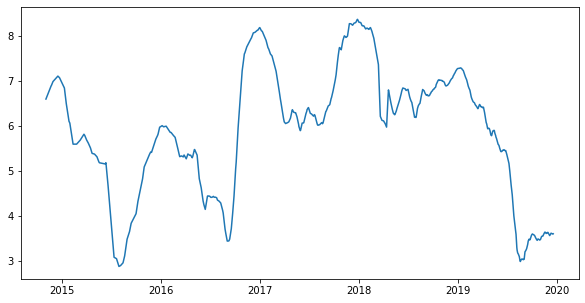

ADF test for  dam_Nuozhadu
ADF Statistic: -3.899377
p-value: 0.002039
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


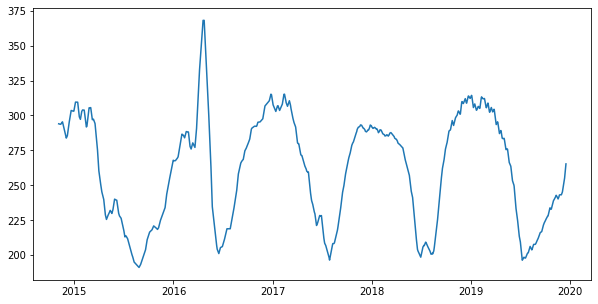

ADF test for  dam_Lamtakhong
ADF Statistic: -1.395375
p-value: 0.584492
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


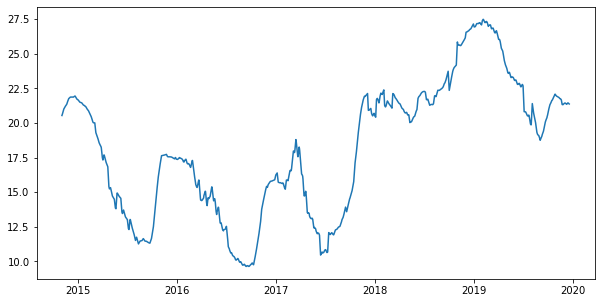

ADF test for  dam_Lamphraphloeng
ADF Statistic: -2.106881
p-value: 0.241757
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


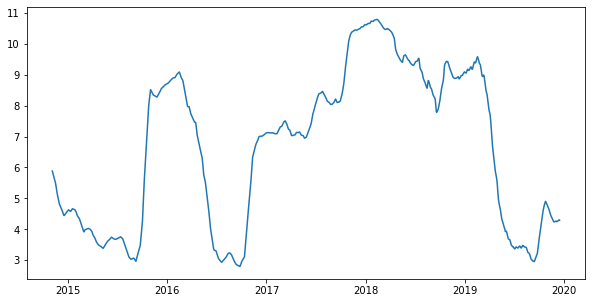

ADF test for  dam_Tabsalao
ADF Statistic: -2.007374
p-value: 0.283349
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


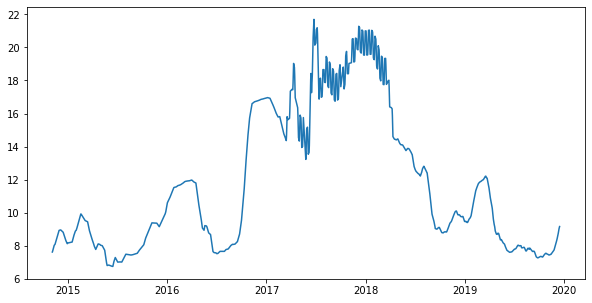

ADF test for  dam_Pak Mun
ADF Statistic: -5.047045
p-value: 0.000018
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


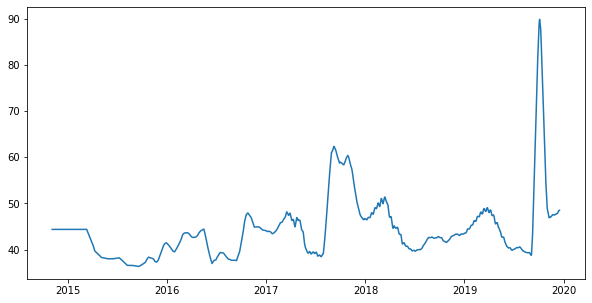

ADF test for  dam_Nam Pung
ADF Statistic: -2.106394
p-value: 0.241951
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


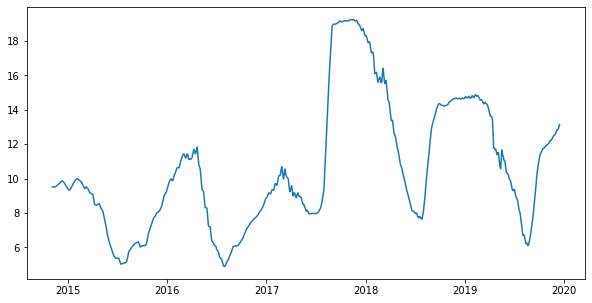

ADF test for  dam_Ea Soup Thuong
ADF Statistic: -2.192119
p-value: 0.209118
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


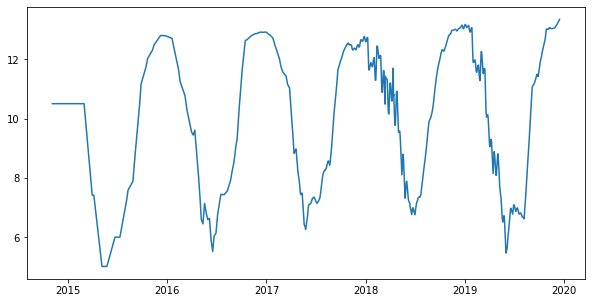

ADF test for  dam_Dachaoshan
ADF Statistic: -4.090512
p-value: 0.001004
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


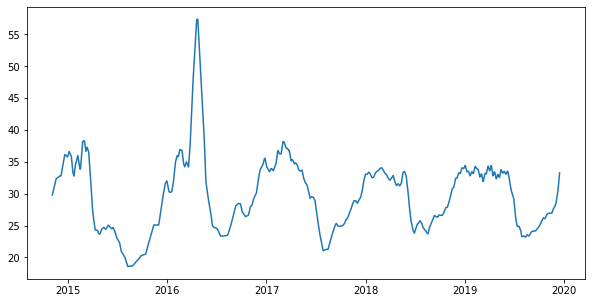

ADF test for  dam_Se San IV
ADF Statistic: -3.403339
p-value: 0.010846
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


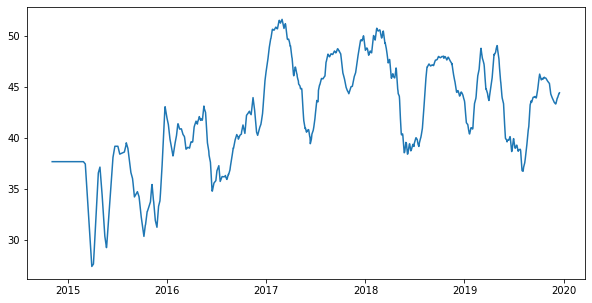

ADF test for  dam_Nam Leuk
ADF Statistic: -3.749121
p-value: 0.003473
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


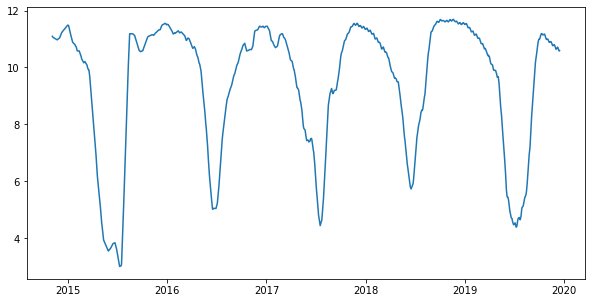

ADF test for  dam_Xiaowan
ADF Statistic: -3.497030
p-value: 0.008064
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


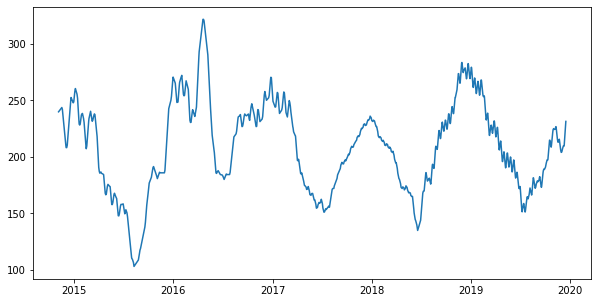

ADF test for  dam_Gongguoqiao
ADF Statistic: -3.775772
p-value: 0.003165
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


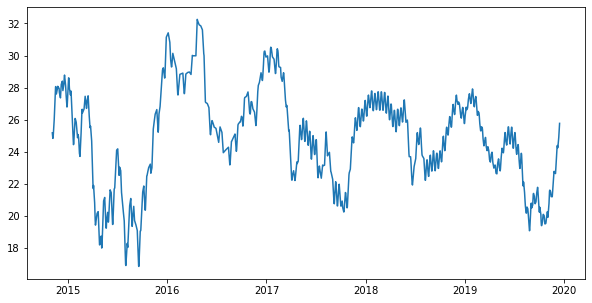

ADF test for  dam_Nam Ngum 2
ADF Statistic: -3.660503
p-value: 0.004704
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


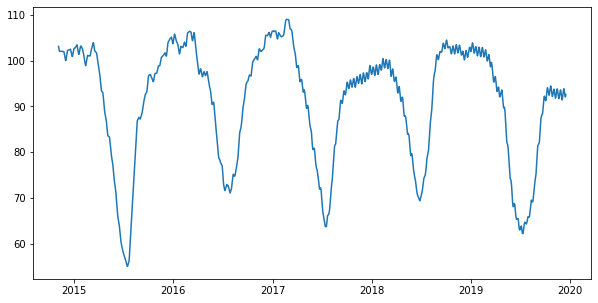

ADF test for  dam_Lamnangrong
ADF Statistic: -1.387300
p-value: 0.588349
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


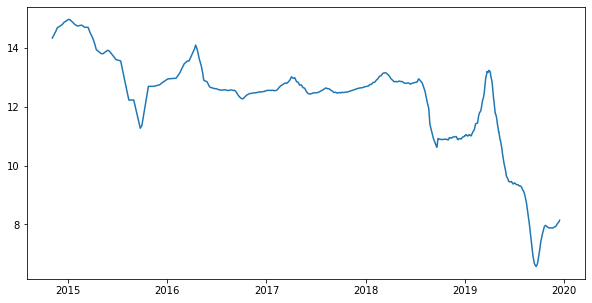

ADF test for  dam_Danhim
ADF Statistic: -3.033852
p-value: 0.031852
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


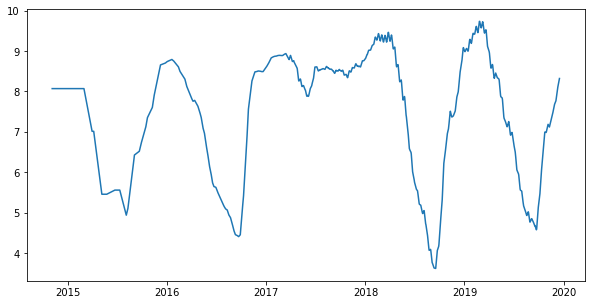

ADF test for  dam_Ham Thuan 1
ADF Statistic: -2.932575
p-value: 0.041689
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


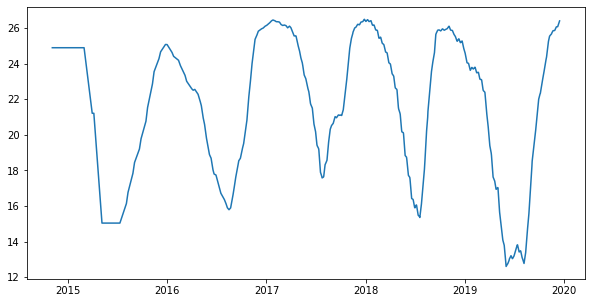

ADF test for  rw_242
ADF Statistic: -5.264200
p-value: 0.000006
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


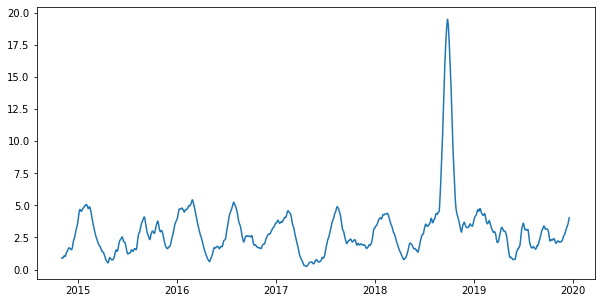

ADF test for  rw_34
ADF Statistic: -3.524084
p-value: 0.007390
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


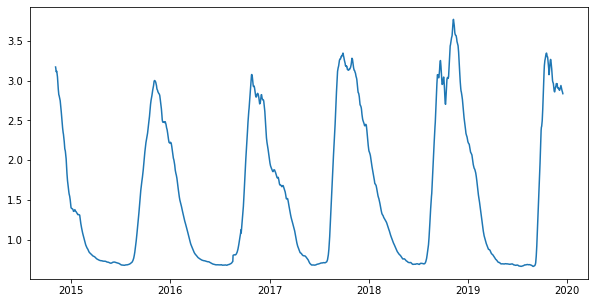

ADF test for  rw_239
ADF Statistic: -4.252971
p-value: 0.000535
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


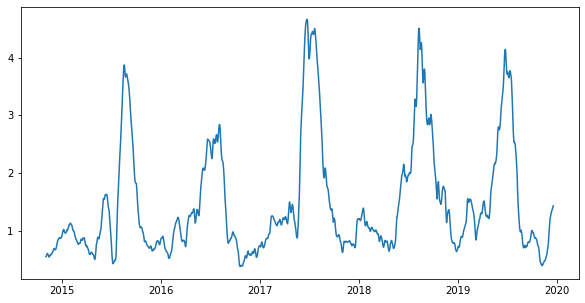

ADF test for  rw_223
ADF Statistic: -2.811967
p-value: 0.056585
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


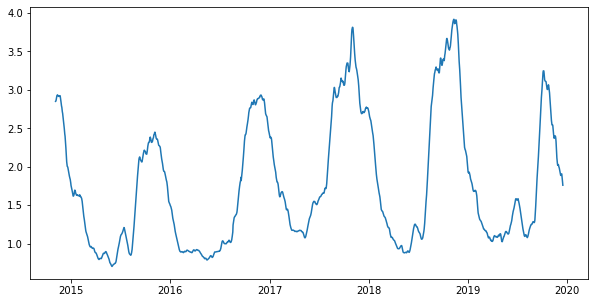

In [12]:
for x in df.columns:
    unit_root_test(x, df[x])

In [18]:
df.corr().style.background_gradient(cmap='coolwarm', axis = None)